In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns

In [8]:
df = pd.read_csv("/Users/Mateo/Desktop/Jupyter/Machine Learning/Data/divorce_data.csv", sep=";")

In [9]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [11]:
X = df.iloc[:, :54]

In [12]:
y = df["Divorce"]

<AxesSubplot:>

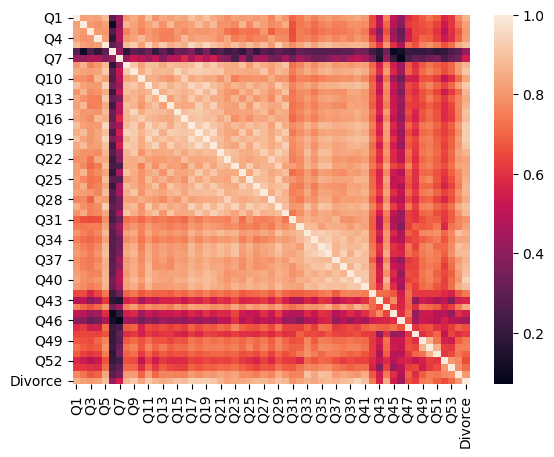

In [13]:
sns.heatmap(df.corr())

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [16]:
model = SVC(random_state=42)

In [17]:
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

/Users/Mateo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


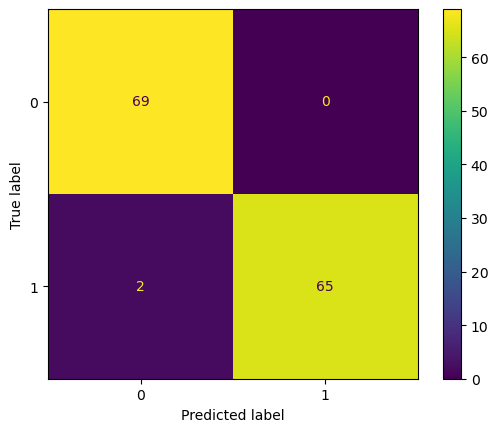

In [18]:
plot_confusion_matrix(model,
                     X_train_scaled,
                     y_train,
                     )

In [19]:
y_pred = model.predict(X_test_scaled)

In [20]:
results = pd.DataFrame({
    "acc": y_test,
    "pred": y_pred,
})

<AxesSubplot:>

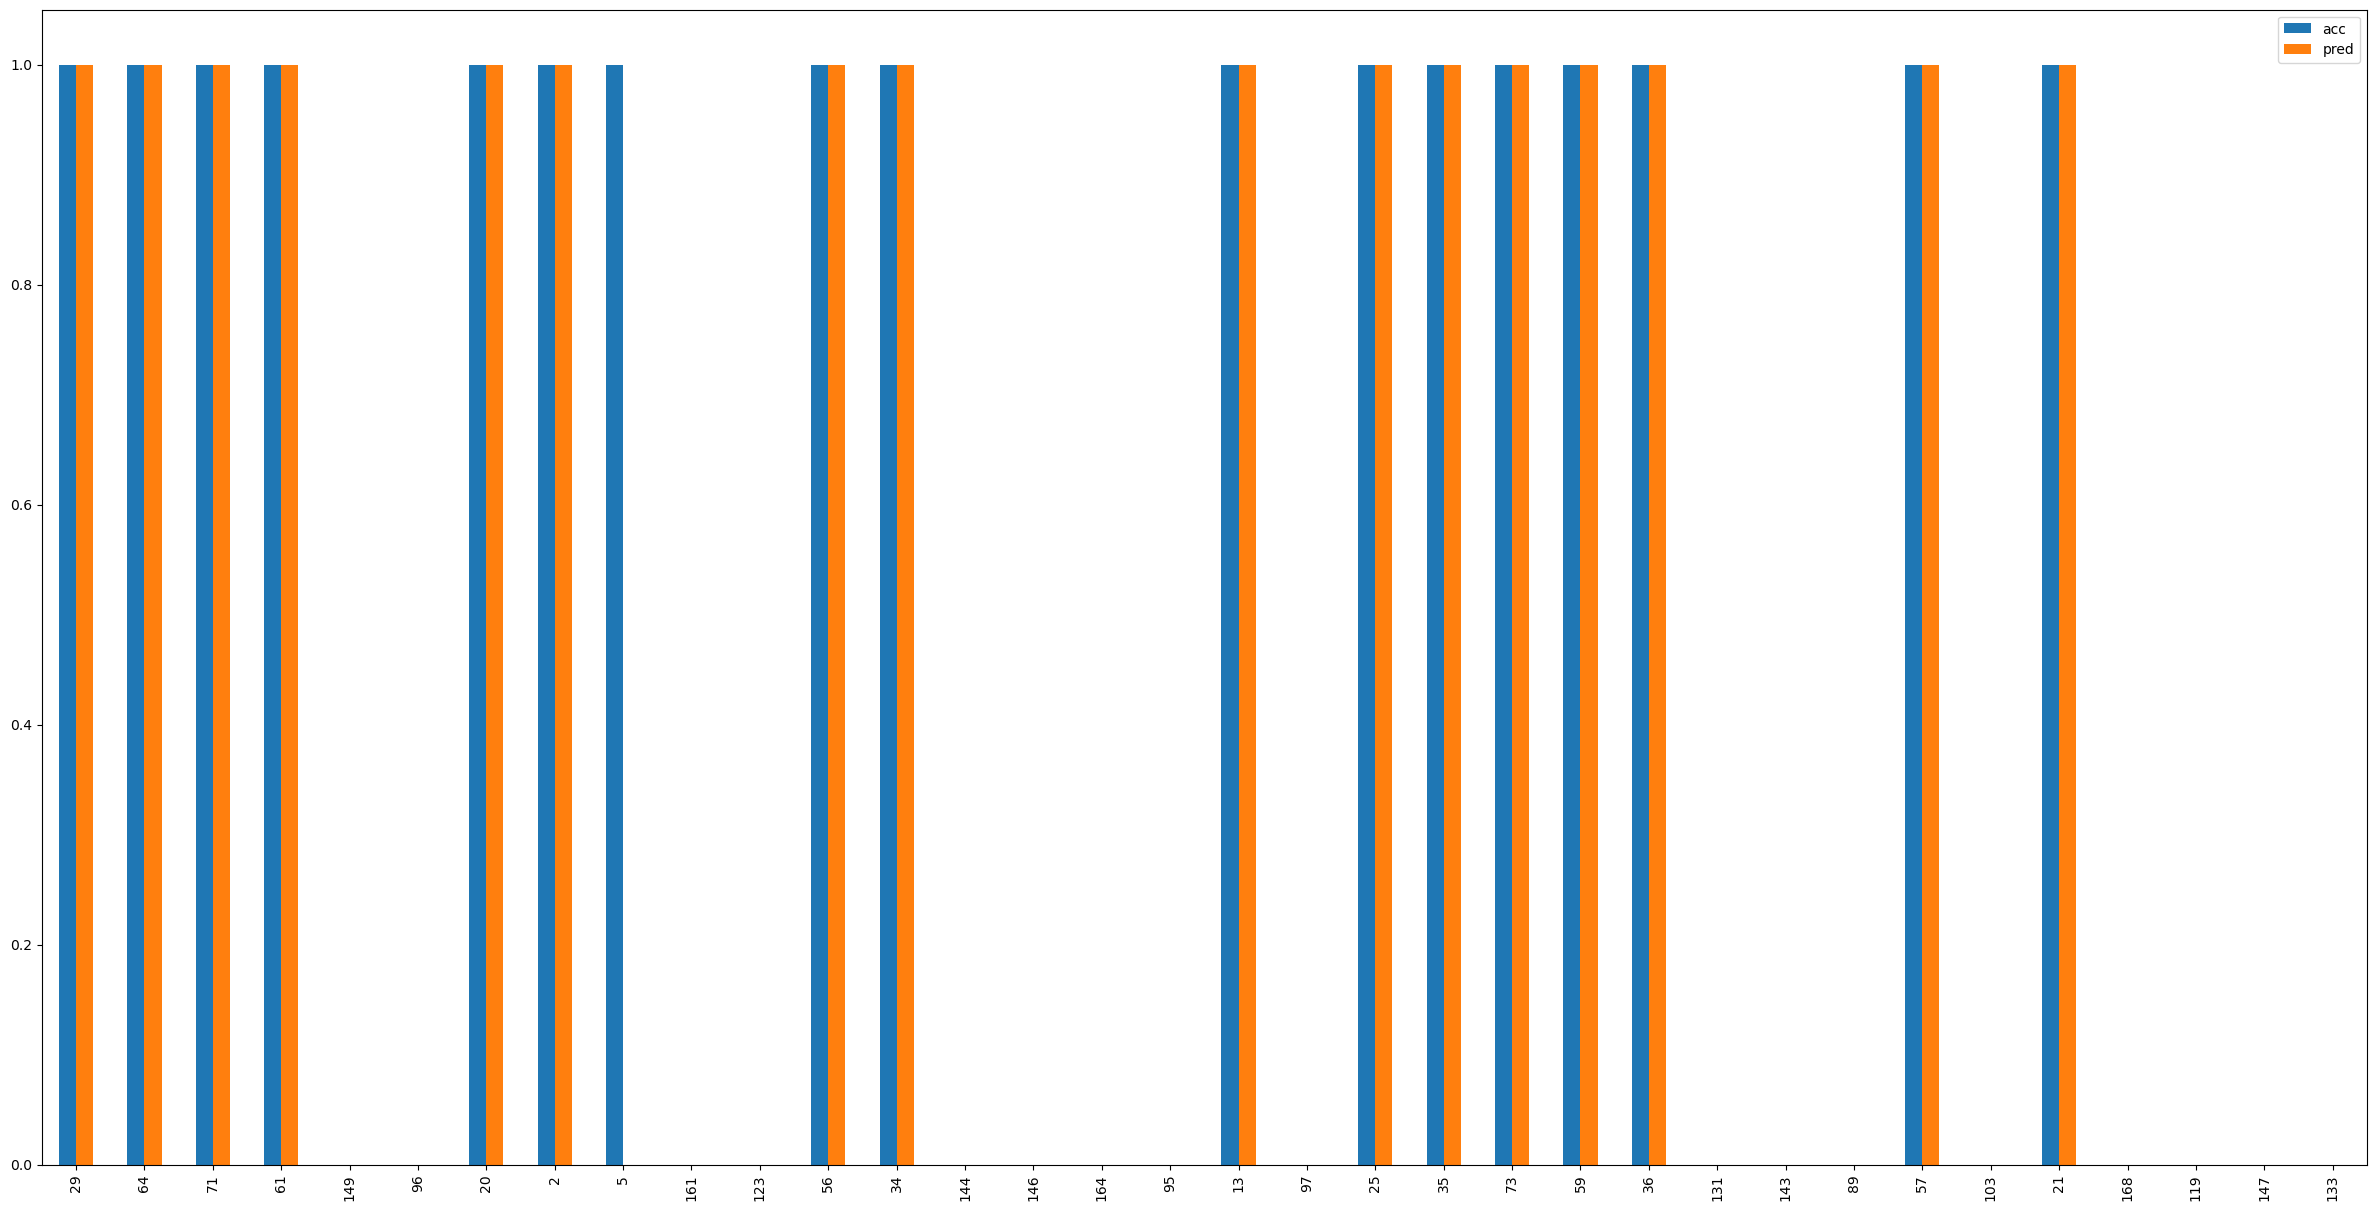

In [21]:
results.plot.bar(figsize=(30, 15))

In [22]:
param_grid = [{
    "C": [0.5, 1, 10, 100],
    "gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf", 'linear'],
}]

optimal_params = GridSearchCV(
SVC(),
param_grid,
cv=5,
scoring='accuracy',
verbose=0)

optimal_params.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'linear']}],
             scoring='accuracy')

In [23]:
print(f"Best params = {optimal_params.best_params_}")
print(f"Best score = {optimal_params.best_score_}")

Best params = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score = 0.9851851851851852
